In [39]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

### Critical variables for this test:
#### note that the macroparticle count is not implemented yet as a variable.

In [40]:
c_ms = 299792458

transv_dist = 1e-9

m_particle_rider = 1.007319468  #proton -amu
m_particle_driver =  207.2 #lead, amu
#m_particle = 0.0005485   #electron -amu
#m_particle = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= -1.
charge_sign_driver = 1.

starting_Pz_rider = 7e5
starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
transv_mom_rider = 1e-2
transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
starting_distance_rider = -100.
starting_distance_driver = 0.

static_steps = 1#set init_steps equal to tot_steps to test static integrator only
ret_steps = 4050
step_size = 4e-8

sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
pcount_rider = 1    #bunch counts
pcount_driver = 1



Inflection seems to be around roughly 2.3 TeV... driver has significant negative energy after this.

#### Beam inits

In [41]:
init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

E_MeV =  2191083.138537528
Gamma =  2334.949007900643
E_rest =  938.385948501337


In [42]:
init_driver, E_MeV_rest_driver = init_bunch(-starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,transv_dist,pcount_driver,charge_sign_driver)


E_MeV =  -2191070.319942706
Gamma =  11.395436994384804
E_rest =  193020.75925874696


#### Function call 

In [43]:
#### parameters not used in this test, but required to run integrator
bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
cav_spacing = 1E5  #distance to the subsequent driver bunch
aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
z_cutoff = 0
wall_pos= 1E5

#function call
retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs


### Calculate plotting variables
#### note that these are only reading the first particle from each trajectory for most parameters. (longitudinal and transverse diplacement takes a mean)

In [44]:
delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)

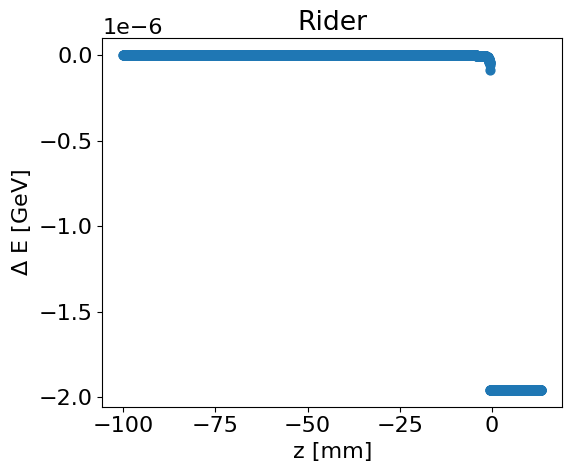

In [45]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

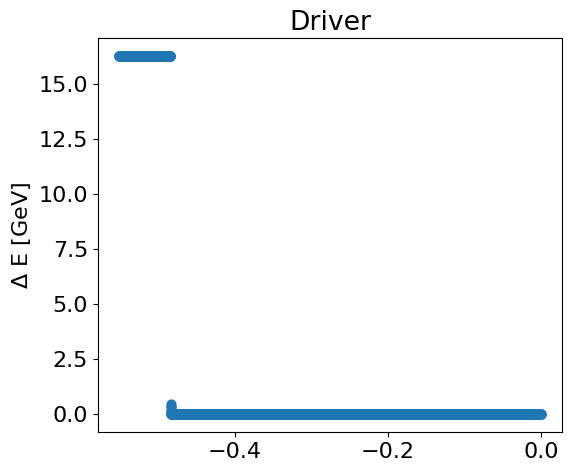

In [46]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



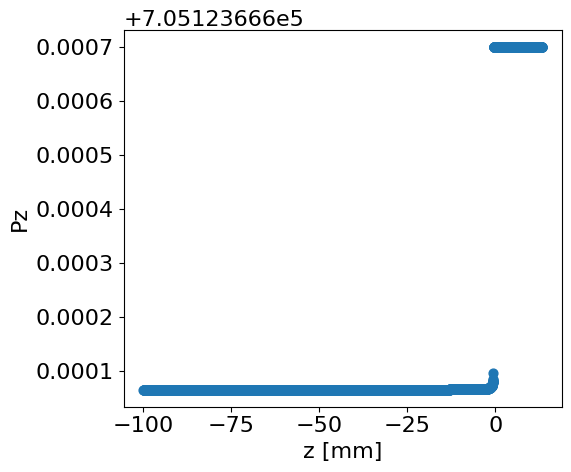

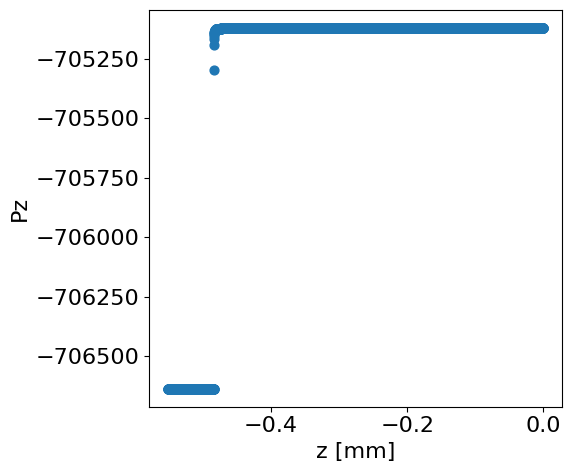

In [47]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [48]:
gammas_drv[1000]

11.39543528606938

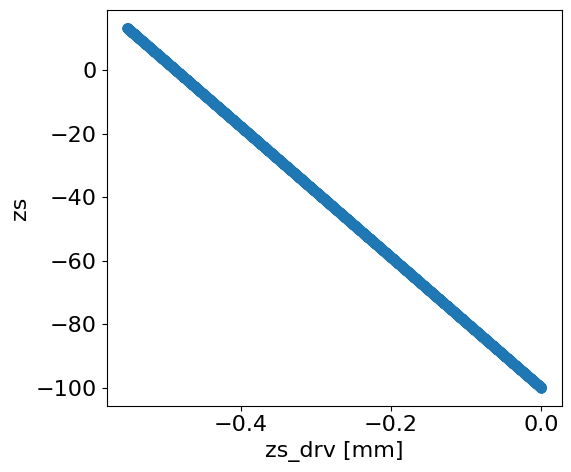

In [49]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

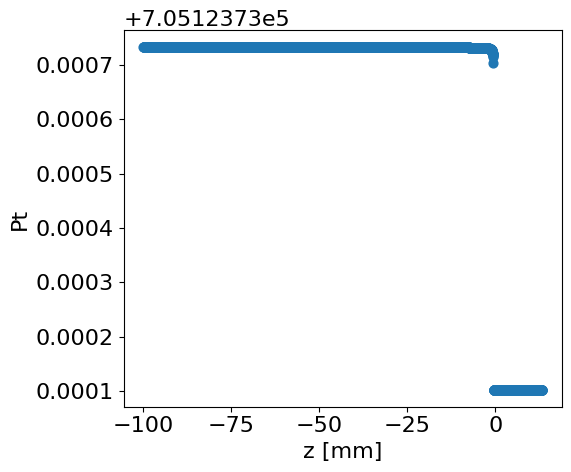

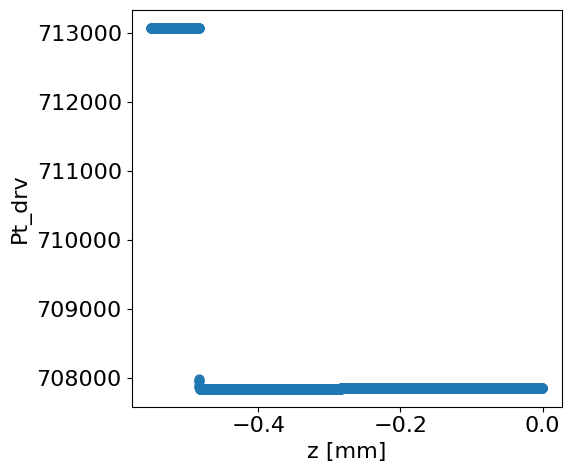

In [50]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

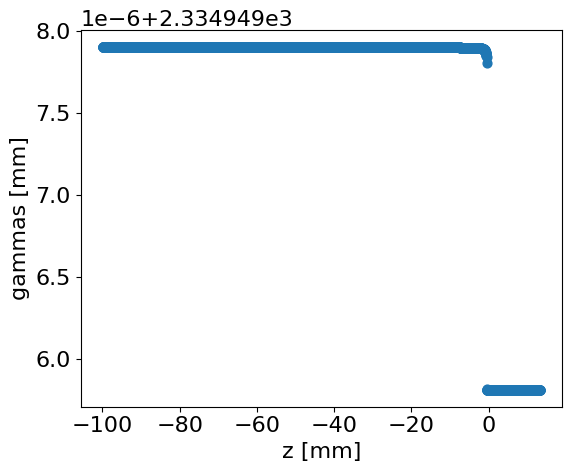

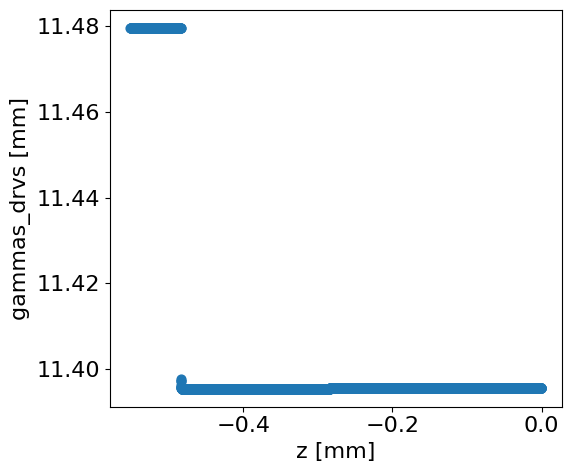

In [51]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

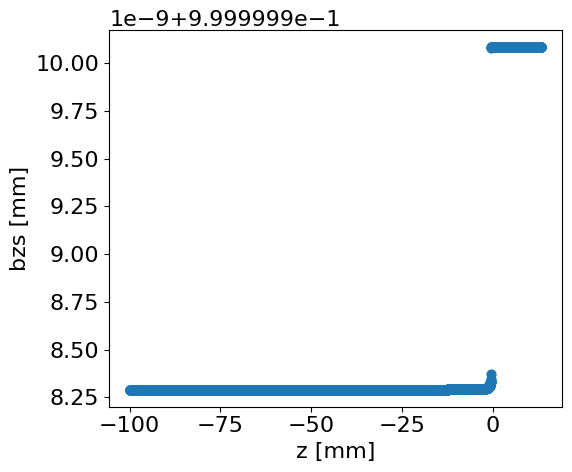

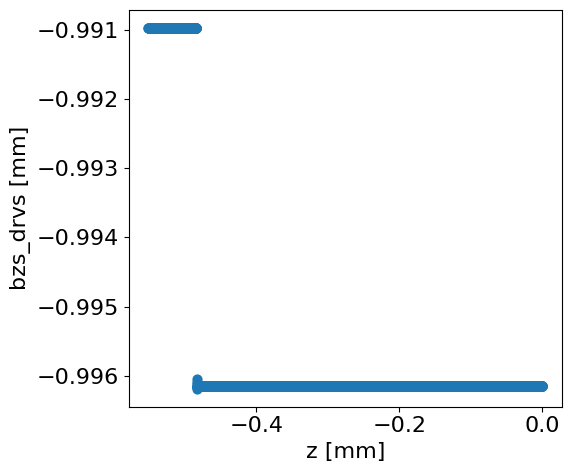

In [52]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,bzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

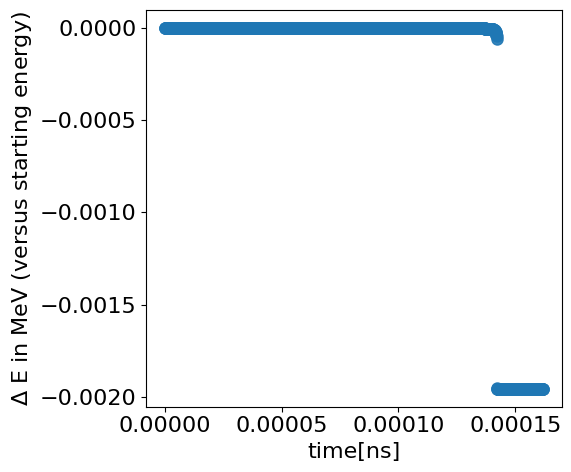

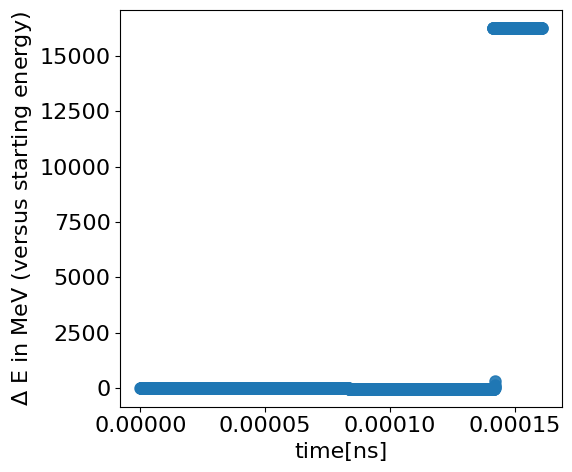

In [53]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_keV,s=40)
ax.plot(np.divide(tees,gammas),delta_e_MeV,'o',markersize=8,markevery=2,alpha=0.9)
ax.set_xlabel("time[ns]")
ax.set_ylabel(r"$\Delta$ E in MeV (versus starting energy)")
#ax.axvline(30,color='g',label="wall position")
#plt.xticks(ticks=[-450],labels=["start"])3
#plt.xlim(0.0787,0.0803)
#plt.ylim(15.5,27.9)
#plt.ylim(15.5,27.9)
#plt.axvline(x = 53.7, color = 'b', label = 'conducting surface disappears')
#plt.axvline(x = 53.76, color = 'b', label = 'conducting surface disappears')

#plt.legend(fontsize=13,loc='lower left')
#plt.show()
plt.tight_layout()



fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_keV,s=40)
ax.plot(np.divide(tees_drv,gammas_drv),delta_e_MeV_drv,'o',markersize=8,markevery=2,alpha=0.9)
ax.set_xlabel("time[ns]")
ax.set_ylabel(r"$\Delta$ E in MeV (versus starting energy)")
#ax.axvline(30,color='g',label="wall position")
#plt.xticks(ticks=[-450],labels=["start"])3
#plt.xlim(0.0787,0.0803)
#plt.ylim(15.5,27.9)
#plt.ylim(15.5,27.9)
#plt.axvline(x = 53.7, color = 'b', label = 'conducting surface disappears')
#plt.axvline(x = 53.76, color = 'b', label = 'conducting surface disappears')

#plt.legend(fontsize=13,loc='lower left')
#plt.show()
plt.tight_layout()


In [54]:
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(zs,tot_e_GeV,s=40)
# #ax.scatter(zs,delta_e_MeV_save,s=40,label="Static")
# ax.set_xlabel("z position [mm]")
# ax.set_ylabel(r"total E in GeV ")
# #ax.axvline(30,color='g',label="wall paosition")
# #plt.xticks(ticks=[-450],labels=["start"])3
# #plt.xlim(-450.5,-448.5)
# #plt.ylim(0.22,0.25)
# #plt.axvline(x = -450, color = 'b', label = 'conducting surface disappears')
# plt.yscale('log')
# plt.legend()
# plt.show()
# #plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.2_55GeV_elec_2GeV_meter.pdf")


# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(zs_drv,tot_e_GeV_drv,s=40)
# #ax.scatter(zs,delta_e_MeV_save,s=40,label="Static")
# ax.set_xlabel("z position [mm]")
# ax.set_ylabel(r"total E in GeV ")
# #ax.axvline(30,color='g',label="wall paosition")
# #plt.xticks(ticks=[-450],labels=["start"])3
# #plt.xlim(-450.5,-448.5)
# #plt.ylim(0.22,0.25)
# #plt.axvline(x = -450, color = 'b', label = 'conducting surface disappears')
# plt.yscale('log')
# plt.legend()
# plt.show()
# #plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.2_55GeV_elec_2GeV_meter.pdf")

In [55]:
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_withexternal,s=40, label= r"iris + $E_z$",alpha=0.9)
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_external_nopinhole,s=40, label= r"$E_z$ only ",alpha=0.9)
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_noexternal,s=40, label="iris only",alpha=0.9)
# ax.set_ylabel(r"$\Delta$ E [MeV]")
# ax.set_xlabel(r"z [$\mu$m]")
# #ax.axvline(30,color='g',label="wall paosition")
# #plt.xlim(-650,1400)
# plt.ylim(9.1E-5,11)
# plt.yscale('log')
# #plt.xscale('log')
# plt.legend(loc="lower right")
# plt.tight_layout()
# #plt.savefig("/home/benfolsom/notebooks/6.23_10MeV_electron_external_compare_irisv1.png",dpi=600)
# #plt.savefig("/home/benfolsom/notebooks/6.23_10MeV_electron_external_repeat_irisv4.png",dpi=600)
# plt.show()

In [56]:
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_withexternal,s=40, label= r"Iris + $E_z$",alpha=0.9)
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_external_nopinhole,s=40, label= r"$E_z$ Only ",alpha=0.9)
# ax.scatter(np.multiply(zs,1e3),delta_e_MeV_save_noexternal,s=40, label="Iris Only",alpha=0.9)
# ax.set_ylabel(r"$\Delta$ E [MeV]")
# ax.set_xlabel(r"z [$\mu$m]")
# #ax.axvline(30,color='g',label="wall paosition")
# #plt.xlim(-650,1400)
# plt.ylim(9.1E-5,0.6)
# plt.yscale('log')
# #plt.xscale('log')
# plt.legend(loc="lower right")
# plt.tight_layout()
# plt.savefig("/home/benfolsom/notebooks/6.23_10MeV_electron_external_compare_irisv3.png",dpi=600)
# #plt.savefig("/home/benfolsom/notebooks/6.23_10MeV_electron_external_repeat_irisv6.png",dpi=600)
# plt.show()

In [57]:
# Pxs_real = np.multiply(gammas,bxs)*c*m_rider
# Pys_real = np.multiply(gammas,bys)*c*m_rider
# Pzs_real = np.multiply(gammas,bzs)*c*m_rider
# Pts_real =np.multiply(gammas,m_rider)*c

# e_p_consv_violation = np.subtract(np.add(np.add(np.square(Pxs_real),np.square(Pys_real)),np.square(Pzs_real)),np.square(Pts_real))
# print(m_rider**2*c**2)
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# #ax.scatter(zs,np.add(e_p_consv_violation,m_rider**2*c**2)*1e12*(1.66e-27)*6.242E12/m_rider)
# ax.scatter(zs,np.add(e_p_consv_violation,m_rider**2*c**2)/(m_rider**2*c**2)*100)
# ax.set_xlabel("z position")
# #ax.set_ylabel("energy drift [MeV*amu] (retarded)")
# ax.set_ylabel(r"energy drift$~\%~$m$^2$c$^2$")
# #ax.set_xlim(-25, 3)
# #ax.set_yscale('log')
# plt.show()

In [58]:
# e_p_consv_violation = np.subtract(np.add(np.add(np.square(Pxs),np.square(Pys)),np.square(Pzs)),np.square(Pts))
# print(m_rider**2*c**2)
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(zs,np.add(e_p_consv_violation,m_rider**2*c**2))
# ax.set_xlabel("z position")
# ax.set_ylabel("energy drift [MeV] (retarded)")
# ax.set_xlim(-25, 3)
# #ax.set_yscale('log')
# plt.show()

In [59]:
# e_p_consv_violation

### Alternative calculation for $\Delta$ E GeV

In [60]:
# btots = np.sqrt(np.square(bxs)+np.square(bys)+np.square(bzs))
# gammas_new = np.sqrt(np.divide(1,1-np.square(btots)))
# gammas_new*m_rider

# E_init_new = gammas_new[0]*m_rider*c**2*0.93149
# E_init = gammas[0]*m_rider*c**2*0.93149


# fig = plt.figure(figsize=(6.5,5),dpi=100)
# ax = fig.add_subplot(1, 1, 1) 
# ax.scatter(zs,np.subtract(gammas_new*m_rider*c**2*0.93149,E_init),s=40)
# ax.scatter(zs,np.subtract(np.multiply(gammas,m_rider*c**2*0.93149),E_init),s=40)
# #ax.scatter(zs,bzs_drv,s=40)
# #ax.scatter(zs,delta_e_MeV_save,s=40,label="Static")
# ax.set_xlabel("z position [mm]")
# ax.set_ylabel(r"Energy [GeV] ")
# #ax.axvline(30,color='g',label="wall paosition")
# #plt.xticks(ticks=[-450],labels=["start"])3
# #plt.xlim(-25,5)
# #plt.ylim(0.22,0.25)
# #plt.axvline(x = z_cutoff, color = 'b', label = 'conducting surface disappears')
# #plt.yscale('log')
# plt.legend(loc='lower right',fontsize=11)
# plt.show()
# plt.tight_layout()
# #plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.3_proton.pdf")